#Outliers

"Outlier é uma observação que está numericamente distante do restante dos dados ou, em palavras simples, é o valor que está fora da faixa."
</p>
Referencias dados: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

<!DOCTYPE html>
<html lang="pt-BR">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<style>
  table {
    width: 100%;
    border-collapse: collapse;
  }
  th, td {
    padding: 8px;
    text-align: left;
    border-bottom: 1px solid #ddd;
  }
  th {
    background-color: #f2f2f2;
  }
</style>
</head>
<body>
<table>
  <thead>
    <tr>
      <th>Método de Detecção de Outliers</th>
      <th>Quando Usar</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>Métodos Hipotetico</strong></td>
      <td></td>
    </tr>
    <tr>
      <td>Teste G - de Grubbs</td>
      <td>Útil quando se deseja determinar se existe pelo menos um valor discrepante (outlier) em uma amostra de dados.</td>
    </tr>
    <tr>
      <td><strong>Métodos de Visualização</strong></td>
      <td></td>
    </tr>
    <tr>
      <td>Boxplot</td>
      <td>Útil para identificar visualmente a presença de outliers e sua distribuição.</td>
    </tr>
    <tr>
      <td>Scatter Plot</td>
      <td>Permite visualizar a dispersão dos dados e identificar pontos que se distanciam significativamente da tendência geral.</td>
    </tr>
    <tr>
      <td><strong>Métodos Estatísticos</strong></td>
      <td></td>
    </tr>
    <tr>
      <td>Z-Score</td>
      <td>Útil quando os dados seguem uma distribuição normal ou aproximadamente normal.</td>
    </tr>
    <tr>
      <td>Intervalo Interquartil (IQR)</td>
      <td>Recomendado quando os dados possuem uma distribuição não normal ou com muitos outliers.</td>
    </tr>
    <tr>
      <td><strong>Método de pré-processamento de dados</strong></td>
      <td></td>
    </tr>
        <tr>
      <td>Percentile Capping</td>
      <td>Utilizado em conjunto com métodos de detecção de outliers para lidar com os valores identificados como extremos..</td>
    </tr>
    <tr>
      <td><strong>Métodos Baseados em Distância</strong></td>
      <td></td>
    </tr>
        <tr>
      <td>Distância Mahalanobis</td>
      <td>Útil quando há correlação entre as variáveis e é importante levar em consideração essa correlação.</td>
    </tr>
    <tr>
      <td>Distância Euclidiana</td>
      <td>Adequado quando não há necessidade de considerar a correlação entre as variáveis.</td>
    </tr>
    <tr>
      <td><strong>Métodos de Agrupamento</strong></td>
      <td></td>
    </tr>
    <tr>
      <td>DBSCAN</td>
      <td>Indicado quando os dados são distribuídos em grupos e os outliers estão em regiões de baixa densidade.</td>
    </tr>
        <tr>
      <td><strong>Métodos de Machine Learning</strong></td>
      <td></td>
    </tr>
    <tr>
      <td>Isolation Forest</td>
      <td>Útil quando os dados possuem uma alta dimensionalidade e não seguem uma distribuição específica.</td>
    </tr>

  </tbody>
</table>

</body>
</html>


#Dataset

In [51]:
import pandas as pd
import numpy as np

In [52]:
#Abrindo os dados
df = pd.read_csv('/content/train.csv')

In [53]:
#Separando os valores que eu quero
df_subset = df[['LotArea', 'SalePrice']].copy() # Usamos .copy() para garantir que estamos operando em um novo DataFrame
#Criando uma nova coluna
Valores = df['SalePrice'] / df['LotArea']

#Hypothesis Testing (Teste G -  de Grubbs)


In [ ]:
import scipy.stats as stats

def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Grubbs Calculated Value:",g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
      print('Não tem outlier')
      print("A partir do teste de grubbs, observamos que o valor calculado é menor que o valor crítico. Aceitamos a hipótese nula e concluímos que não há valores atípicos.\n")
    else:
      print('Tem outlier')
      print("Do teste de grubbs, observamos que o valor calculado é maior que o valor crítico. Rejeitamos a hipótese nula e concluímos que há um valor atípico.\n")

grubbs_test(Valores)

#Métodos de Visualização

##Boxplot

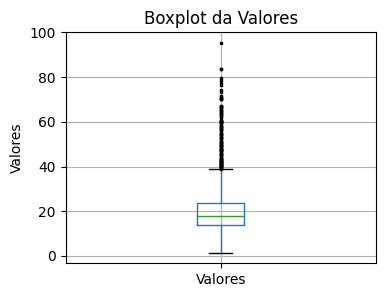

In [101]:
import matplotlib.pyplot as plt

Plot = pd.DataFrame(Valores,columns=['Valores'])

# Gerar o boxplot
plt.figure(figsize=(4, 3))
Plot.boxplot(column=['Valores'],flierprops=dict(marker='s', markerfacecolor='red', markersize=2))
plt.title('Boxplot da Valores')
plt.ylabel('Valores')
plt.show()

##Scatter Plot

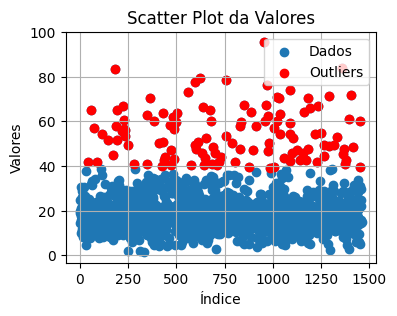

In [103]:
import matplotlib.pyplot as plt

Plot = pd.DataFrame(Valores,columns=['Valores'])

# Calcular os quartis
Q1 = Plot['Valores'].quantile(0.25)
Q3 = Plot['Valores'].quantile(0.75)
IQR = Q3 - Q1

# Identificar os outliers
outliers = Plot[(Plot['Valores'] < (Q1 - 1.5 * IQR)) | (Plot['Valores'] > (Q3 + 1.5 * IQR))]

# Gerar o scatter plot
plt.figure(figsize=(4, 3))
plt.scatter(df.index, Plot['Valores'], label='Dados')
plt.scatter(outliers.index, outliers['Valores'], color='red', label='Outliers')
plt.title('Scatter Plot da Valores')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.show()

##Mahalanobis Distance

In [ ]:
from scipy.spatial.distance import mahalanobis

# Calculando a média para cada coluna
means = Valores.mean()

# Calculando a matriz de covariância (neste caso, é apenas a variância)
variance = np.var(Valores)

# Ponto de referência (pode ser a média ou qualquer outro ponto de interesse)
reference_point = means

# Calculando a distância de Mahalanobis para cada ponto em relação ao ponto de referência
distances = [mahalanobis([point], [reference_point], 1/variance) for point in Valores]

#Criando o df
distances_df = pd.DataFrame(distances, columns=['Distances'])
distances_df['Valores'] = Valores

# Definindo um limite para as distâncias de Mahalanobis
limite = 3  # Você pode ajustar este valor conforme necessário

# Removendo os pontos que estão além do limite de distância de Mahalanobis
df_sem_outliers = distances_df[np.array(distances) < limite]
outliers = distances_df[np.array(distances) >= limite]

print('Antes', distances_df['Valores'].count(),'Depois', df_sem_outliers['Valores'].size, 'Outliers:', outliers['Valores'].size)


###Reference_point

- **Média (Centro de Massa):** Este é o ponto mais comum de referência. Usar a média como ponto de referência é útil quando você deseja calcular a distância de cada ponto de dados em relação ao centro médio de todo o conjunto de dados.
    ```python
    means = Valores.mean()
    reference_point = means
    ```

- **Mediana:** Em alguns casos, pode ser mais apropriado usar a mediana como ponto de referência, especialmente se seus dados forem assimétricos ou contiverem outliers.
    ```python
    median = np.median(Valores)
    reference_point = median
    ```

- **Moda:** Se você estiver lidando com dados categóricos, a moda (valor mais comum) pode ser uma escolha adequada para o ponto de referência.
    ```python
    mode = scipy.stats.mode(Valores)[0][0]
    reference_point= mode
    ```

- **Ponto Arbitrário de Interesse:** Dependendo do seu problema, você também pode escolher um ponto específico de interesse como o ponto de referência. Isso pode ser útil em situações onde você tem um ponto específico que deseja usar como referência para calcular as distâncias.
    ```python
    interest_point = 10
    reference_point = interest_point
    ```


#Z-score

In [ ]:
from scipy.stats import zscore

z_scores = zscore(Valores)

z_scores_df = pd.DataFrame(z_scores,columns=['zscores'])

z_scores_df['Valores'] = Valores

limite_z = 3

# Filtrar os valores onde 'zscore' é maior que o limite_z
df_sem_outliers = z_scores_df.loc[z_scores_df['zscores'] < limite_z]

Outliers = z_scores_df.loc[z_scores_df['zscores'] >= limite_z]


print('Antes', Valores.count(),'Depois', df_sem_outliers['Valores'].count(), 'Outliers:', Outliers['Valores'].count())


#Robust Zscore

In [ ]:
from sklearn.preprocessing import RobustScaler

# Inicializar o scaler
scaler = RobustScaler()

# Transformar os dados em uma matriz 2D
dados_2d = Valores.values.reshape(-1, 1)

# Aplicar o RobustScaler
robust_scaled_data = scaler.fit_transform(dados_2d)

# Criar um DataFrame com os dados escalados
robust_scaled_df = pd.DataFrame(robust_scaled_data, columns=['Score'])

robust_scaled_df['PricePerArea'] = Valores

limite_z = 3

# Filtrar os valores onde 'zscore' é maior que o limite_z
df_sem_outliers = robust_scaled_df.loc[robust_scaled_df['Score'] < limite_z]

Outliers = robust_scaled_df.loc[robust_scaled_df['Score'] >= limite_z]

print('Antes', Valores.count(),'Depois', df_sem_outliers['PricePerArea'].count(), 'Outliers:', Outliers['PricePerArea'].count())


#I.Q.R method

In [ ]:
# Calcular Q1, Q3 e IQR
Q1 = np.percentile(Valores, 25)
Q3 = np.percentile(Valores, 75)
IQR = Q3 - Q1

# Identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar os valores onde 'Valores' estão fora dos bounds
df_sem_outliers = Valores[(Valores > lower_bound) & (Valores < upper_bound)]  # & = and
outliers = Valores[(Valores < lower_bound) | (Valores > upper_bound)]  # | = OR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

print('Antes', Valores.count(),'Depois', df_sem_outliers.count(), 'Outliers:', outliers.count())

#print("Outliers:", outliers)

#Winsorization method(Percentile Capping)

In [ ]:
# Definir percentis para winsorização (5%)
lower_percentile = 5
upper_percentile = 95

# Calcular os percentis
lower_limit = np.percentile(Valores, lower_percentile)
upper_limit = np.percentile(Valores, upper_percentile)

# Winsorizar os dados
# Identificar os índices dos valores dentro do intervalo desejado
indices_dentro_intervalo = (Valores >= lower_limit) & (Valores <= upper_limit)
indices_fora_intervalo = (Valores < lower_limit) | (Valores > upper_limit)


# Criar um novo array contendo apenas os valores dentro do intervalo
data_winsorized = Valores[indices_dentro_intervalo]
outliers = Valores[indices_fora_intervalo]

data_winsorized2 = pd.DataFrame(data_winsorized, columns=['Valores'])

print("lower_limit:", lower_limit)
print("upper_percentile:", upper_limit)

print('Antes', Valores.count(),'Depois', data_winsorized.size, 'Outliers:', outliers.size)


#Métodos Baseados em Distância

###Diferença entre Euclidean e Mahalanobis

<p>
A <b>distância euclidiana</b> é uma medida de distância padrão que trata todas as dimensões igualmente.
<p>
A <b>distância de Mahalanobis</b> leva em consideração a covariância entre as dimensões dos dados e normaliza as diferenças entre as variáveis pela variabilidade dos dados em cada direção

<!DOCTYPE html>
<html lang="pt-BR">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<style>
  .center {
    display: flex;
    justify-content: center;
  }
  img {
    max-width: 20%; /* Define o tamanho máximo da imagem como 50% da largura do seu contêiner */
    height: auto; /* Mantém a proporção da imagem */
  }
</style>
</head>
<body>

<div class="center">
  <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*KzsugPQU-BTjvDACXbu9qw.jpeg" alt="Imagem">
</div>

</body>
</html>


##Euclidean Distance

In [ ]:
# Calculando a média para cada coluna
means = Valores.mean()

# Calculando a distância euclidiana de cada ponto em relação à média
distances = np.abs(Valores - means)

distances_df = pd.DataFrame(distances, columns=['Distances'])

distances_df['Valores'] = Valores

# Definindo um limite para as distâncias euclidianas
limite = 3  # Você pode ajustar este valor conforme necessário

# Removendo os outliers
df_sem_outliers = distances_df[distances > limite]
outliers = distances_df[distances < limite]

print('Antes', Valores.count(),'Depois', df_sem_outliers['Valores'].size, 'Outliers:', outliers['Valores'].size)



#Metodos Menos utilizados

##DBSCAN Clustering

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

#Dando reshape para os dados ficarem 2d, caso necessario
#dados_2d = Valores.values.reshape(-1, 1)

# Padronizar os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_subset)

# Criar o modelo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Ajustar o modelo aos dados
dbscan.fit(data_scaled)

# Adicionar rótulos de cluster ao DataFrame original
df_subset['cluster'] = dbscan.labels_

# Número de clusters no resultado, ignorando o ruído se estiver presente.
n_clusters_ = len(set(df_subset)) - (1 if -1 in df_subset else 0)
n_noise_ = list(df_subset).count(-1)

outliers = df_subset[df_subset['cluster'] == -1]
df_sem_outliers = df_subset[df_subset['cluster'] == 0]

print('Antes', Valores.count(),'Depois', df_sem_outliers['SalePrice'].size, 'Outliers:', outliers['SalePrice'].size)

print('Número estimado de clusters: %d' % n_clusters_)
print('Número estimado de pontos de ruído: %d' % n_noise_)

##Isolation Forest
Esse modo é bem ruim.

In [ ]:
from sklearn.ensemble import IsolationForest

#Dando reshape para os dados ficarem 1d, caso necessario
#dados_2d = Valores.values.reshape(-1, 1)

# Criar o modelo Isolation Forest
clf = IsolationForest(contamination=0.1, random_state=42)

# Ajustar o modelo aos dados
clf.fit(df_subset)

# Prever anomalias (outliers)
y_pred = clf.predict(df_subset)

Forest_df = pd.DataFrame(y_pred, columns=['Forest'])

Forest_df['PricePerArea'] = Valores

df_sem_outliers = Forest_df.loc[Forest_df['Forest'] == 1]
outliers = Forest_df.loc[Forest_df['Forest'] == -1]

print('Antes', Valores.count(),'Depois', df_sem_outliers['PricePerArea'].size, 'Outliers:', outliers['PricePerArea'].size)
